In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
ppo_reward = np.loadtxt("org.csv", delimiter = ",")
ppo_non_model_reward = np.loadtxt("org_non.csv", delimiter = ",")
dqn_reward = np.loadtxt("DQN_reward.csv", delimiter = ",")
dqn_non_model_reward = np.loadtxt("DQN_non_model_reward.csv", delimiter = ",")
ppo_val_tune_reward = np.loadtxt("val_net.csv", delimiter = ",")
init_model_reward = np.loadtxt("init_reward.csv", delimiter = ",")
avg_num = 4
num_of_epi = np.arange(50*avg_num, 50001, 50* avg_num)

In [3]:
def moving_average(data, num):
    res = [np.mean(data[i - num:i]) for i in range (num, len(data)+1)]
    return res

In [4]:
def step_average(data, num):
    res = [np.mean(data[i * num:(i + 1) * num]) for i in range (int(len(data)/num))]
    return res

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


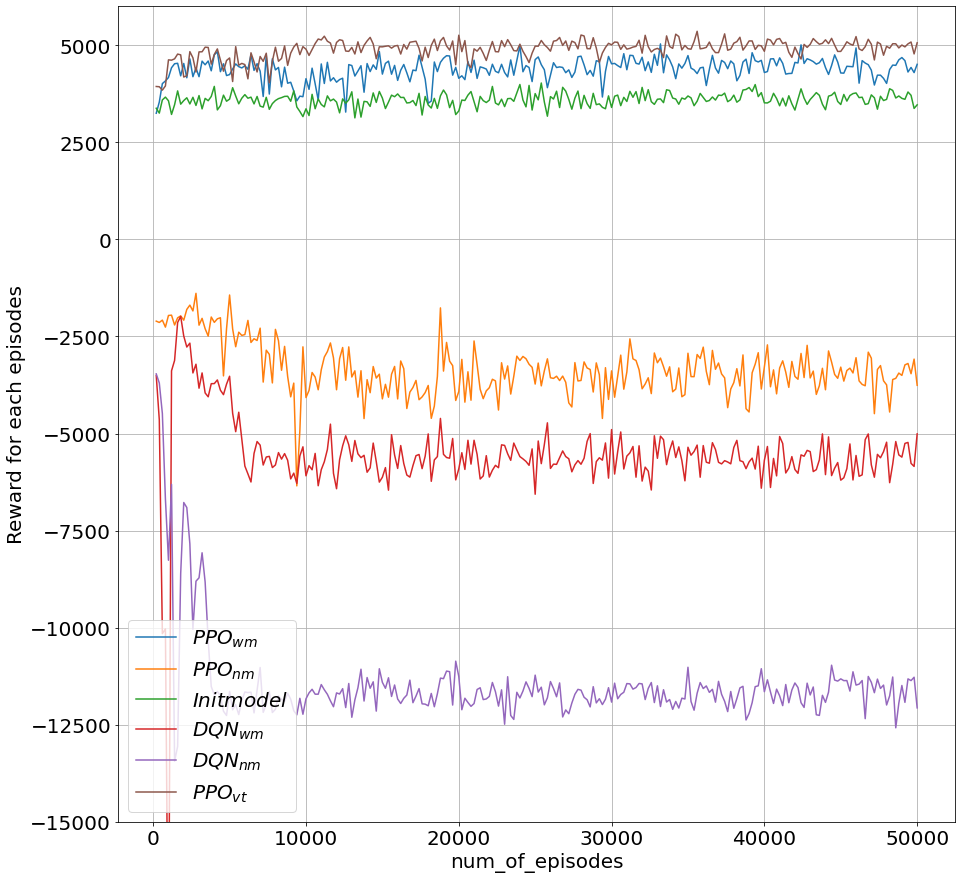

In [5]:
plt.figure(figsize = (15, 15))
plt.rcParams['font.size'] = 20
plt.ylim(-15000,6000)
plt.xlabel("num_of_episodes")
plt.ylabel("Reward for each episodes")
plt.plot(num_of_epi, step_average(ppo_reward, avg_num), label = r"$PPO_{wm}$")
plt.plot(num_of_epi, step_average(ppo_non_model_reward, avg_num), label = r"$PPO_{nm}$")
plt.plot(num_of_epi, step_average(init_model_reward, avg_num), label = r"$Initmodel$")
plt.plot(num_of_epi, step_average(dqn_reward, avg_num), label = r"$DQN_{wm}$")
plt.plot(num_of_epi, step_average(dqn_non_model_reward, avg_num), label = r"$DQN_{nm}$")
plt.plot(num_of_epi, step_average(ppo_val_tune_reward[100:], avg_num), label = r"$PPO_{vt}$")
plt.grid()
plt.legend()
plt.savefig("fin_res_1.eps", format = 'eps', dpi=300)

In [6]:
def moving_average(data, num):
    res = [np.mean(data[i - num:i]) for i in range (num, len(data))]
    return np.hstack([data[:num], res])

In [7]:
avg_num = 5
num_of_epi = np.arange(50, 50001, 50)

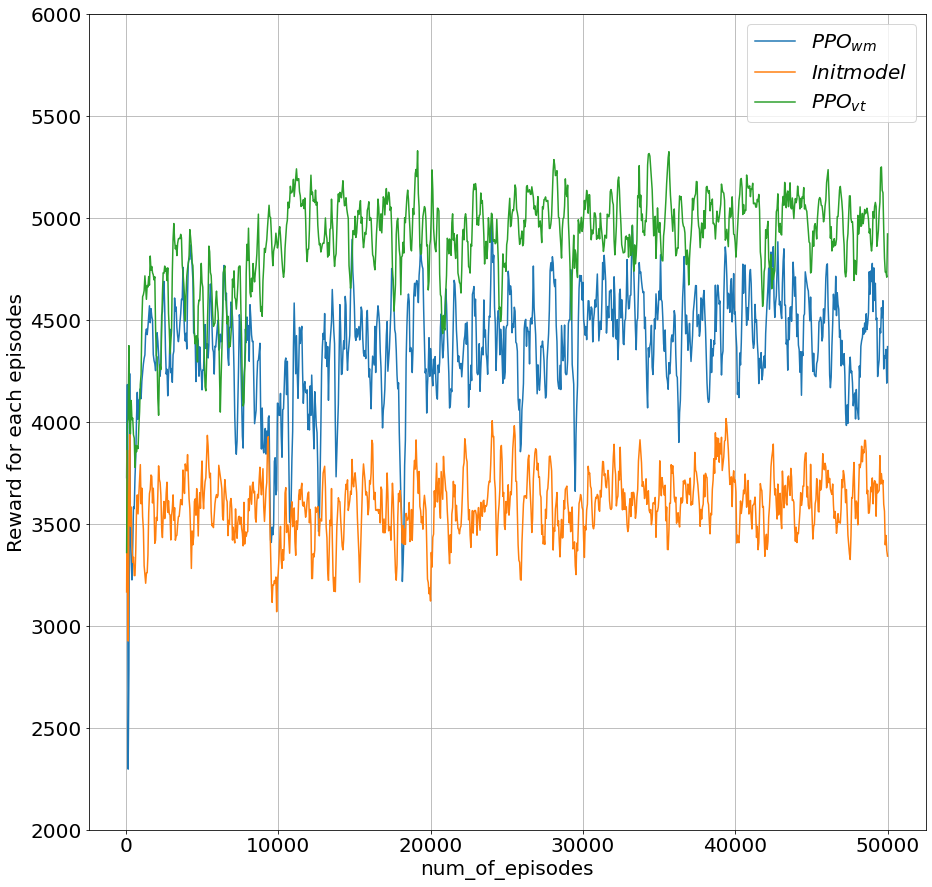

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize = (15, 15))
plt.ylim(2000,6000)
plt.xlabel("num_of_episodes")
plt.ylabel("Reward for each episodes")
plt.plot(num_of_epi, moving_average(ppo_reward, avg_num), label = r"$PPO_{wm}$")
plt.plot(num_of_epi, moving_average(init_model_reward, avg_num), label = r"$Initmodel$")
plt.plot(num_of_epi, moving_average(ppo_val_tune_reward[100:], avg_num), label = r"$PPO_{vt}$")
plt.grid()
plt.legend()
plt.show()
plt.savefig("fin_res_2.eps", format = 'eps', dpi=300)